# Busy Kernel - CMPINF0010 Final Project

![Pokemon](https://media.giphy.com/media/xuXzcHMkuwvf2/giphy.gif).

For this project, we wanted to find which neighborhood in Pittsburgh would be the best for playing Pokemon Go. In the game, Pokemon tend to spawn in parks, so we knew that one of our metrics would measure the size of the parks in each neighborhood. We also discovered that most Pokemon Go players are adults, so neighborhoods with less children could correlate to more Pokemon Go players. Furthermore, when you're walking around staring at your phone, you don't want to have to be super aware of your surroundings, so our third metric measured how safe a neighborhood is by looking at the recent police reports.  

So, ideally, the best neighborhood will have:  
-the least number of police reports (fewer police reports = less crimes = more safe)  
-the greatest number of park equipment (more park equipment = more parks/larger park)  
-the least children  


### Import pandas and read in data sets for first metric

In [72]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#read in files
pop = pd.read_csv("https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/82f29015-6905-4b1c-8300-afe9bb2231b3/download/total-population.csv")
crimes = pd.read_csv("https://data.wprdc.org/datastore/dump/1797ead8-8262-41cc-9099-cbc8a161924b")

### 1st Metric: Determine neighborhood with least number of police reports

In [73]:
#make dictionary
crimes_dict = dict()

#read through and add to dictionary
for row in range(len(crimes)):
    #get the neighborhood name
    name = crimes.loc[row, 'INCIDENTNEIGHBORHOOD']
    
    #if it's already in the dictionary:
    if name in crimes_dict:
        crimes_dict[name] += 1
    #if not set it equal to 1
    else:
        crimes_dict[name] = 1

#make it a series for sorting
num_crimes_series = pd.Series(crimes_dict, name = 'Neighborhoods')

#print
num_crimes_series.sort_values()[:]

Ridgemont                      1
Outside County                 1
Summer Hill                    2
Hays                           2
Swisshelm Park                 2
                            ... 
Brookline                     79
Mount Washington              96
Carrick                      105
South Side Flats             135
Central Business District    253
Name: Neighborhoods, Length: 94, dtype: int64

#### This is a lot of neighborhoods. Let's look at the top 10 with the least and graph it

Text(0, 0.5, 'Total amount of reports')

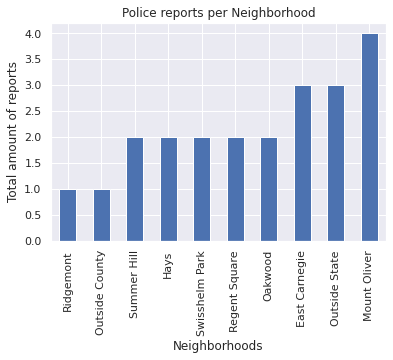

In [74]:
sns.set()

num_crimes_series.sort_values()[:10].plot.bar()
plt.title('Police reports per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Total amount of reports')


#### However, these top neighborhoods also have the lowest populations, so let's consider population now

Text(0, 0.5, 'Total amount of reports/population')

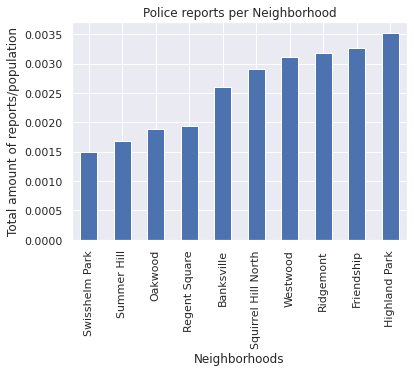

In [75]:
#read through and add to dictionary
for row in range(len(pop)):
    #get the neighborhood name
    name = pop.loc[row, 'Neighborhood']
    
    #if it's already in the dictionary:
    if name in crimes_dict:
        crime_rate = crimes_dict[name]/pop.loc[row, 'Estimate; Total']
        crimes_dict[name] = crime_rate

#make it a series for sorting
pop_series = pd.Series(crimes_dict, name = 'Population of Neighborhoods')

#graph it
pop_series.sort_values()[:10].plot.bar()
plt.title('Police reports per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Total amount of reports/population')

#### Now that we consider population, we can see that the neighborhoods with the lowest crime rates are completely different  

Scoring:  
The top neighborhood will get 15 points, and the 15th neighborhood will get 1

In [76]:
#make a sorted dictionary
sort = pop_series.sort_values().to_dict()
hood_rank = dict()

i=15
#add score to first 15 items
for key in sort:
    hood_rank[key] = i
    i-=1
    if i==0:
        break

print(hood_rank)

{'Swisshelm Park': 15, 'Summer Hill': 14, 'Oakwood': 13, 'Regent Square': 12, 'Banksville': 11, 'Squirrel Hill North': 10, 'Westwood': 9, 'Ridgemont': 8, 'Friendship': 7, 'Highland Park': 6, 'Stanton Heights': 5, 'Lincoln Place': 4, 'Squirrel Hill South': 3, 'Windgap': 2, 'North Oakland': 1}


#### Grace's Conclusion:
The top neighborhood based on crime rate is **Swisshelm Park**.

### 2nd Metric: Determine the neighborhood with the least amount of kids  
Oddly enough, we discovered that majority of Pokemon Go players are adults. With that in mind, we decided to factor in the  number of children in an area as a criteria. In order to do so, we used school enrollment data by neighborhood to determine which neighborhood had the lowest number of children. The lower the amount of children, the better in this metric.

To start, we read through the dataset and created a dataframe.

In [77]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas 

data = pd.read_csv("https://data.wprdc.org/dataset/27b6eef7-8825-4cc4-8b48-52c17ac80d37/resource/7b0660d1-c812-496d-ab0a-8560902e9e70/download/neighborhood_school_enrollment.csv")
pd.DataFrame(data)

,neighborhood,school,enrolled_students
0,Allegheny Center,Other,50
1,Allegheny Center,PITTSBURGH KING PreK-8,34
2,Allentown,Other,96
3,Allentown,PITTSBURGH GRANDVIEW PreK-5,76
4,Allentown,PITTSBURGH SOUTH HILLS 6-8,50
...,...,...,...
501,Wilkinsburg Borough,Other,72
502,Windgap,Other,50
503,Windgap,PITTSBURGH WESTWOOD K-5,29
504,Windgap,PITTSBURGH BRASHEAR HIGH SCHOOL,19


We noticed that this dataset includes multiple schools within the same neighborhood. We wanted to condense the data in order to only show one row per neighborhood and have the total number of children per neighborhood be shown as the final value. In order to simplify the data, we made a dictionary in order to condense the information. 

In [78]:
#make dictionary
kids_dict = dict()

#read through and add to dictionary
for row in range(len(data)):
    #get the neighborhood name
    name = data.loc[row, 'neighborhood']
    
    #if it's already in the dictionary:
    if name in kids_dict:
        kids_dict[name] += data.loc[row, 'enrolled_students']
    #if not set it equal to the value
    else:
        kids_dict[name] = data.loc[row, 'enrolled_students']

#make it a series for sorting
num_kids_series = pd.Series(kids_dict, name = 'neighborhood')

#print
num_kids_series.sort_values()[:]

North Oakland            11
Central Oakland          16
Golden Triangle          18
Ridgemont                20
Saint Clair              25
                       ... 
Squirrel Hill South     679
Sheraden                694
Beechview               794
Brookline              1169
Carrick                1276
Name: neighborhood, Length: 87, dtype: int64

Condensing the data made it a lot easier to work with. But even in this state, there were still many rows that were significantly outside the range we were going for.

To narrow down the results, the top ten neighborhoods with the least amount of students is plotted.

Text(0, 0.5, 'Number of students')

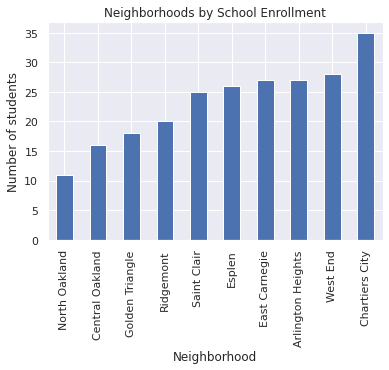

In [79]:
sns.set()
num_kids_series.sort_values()[:10].plot.bar()
plt.title('Neighborhoods by School Enrollment')
plt.xlabel('Neighborhood')
plt.ylabel('Number of students')

Alas, we can start to see some neighborhoods separate themselves from the rest of the pack. But just to make sure, I created a pie chart with the top 5 nieghborhoods. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff572f395e0>],
      dtype=object)

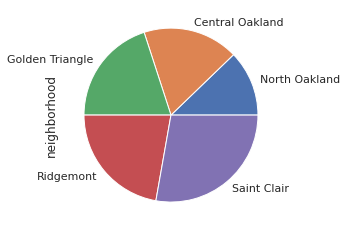

In [80]:
num_kids_series.sort_values()[:5].plot.pie(subplots=True)

#### Sophia's Conclusion:  
**North Oakland** is the best neighborhood based on school enrollment.

In [81]:
#add to hood_ranks so final decision can be made
sort_2 = num_kids_series.sort_values().to_dict()

i=15
#add score to first  items
for key in sort_2:
    if key in hood_rank:
        hood_rank[key] += i
    else:
        hood_rank[key] = i
    i-=1
    if i==0:
        break

print(hood_rank)

{'Swisshelm Park': 15, 'Summer Hill': 18, 'Oakwood': 13, 'Regent Square': 15, 'Banksville': 11, 'Squirrel Hill North': 10, 'Westwood': 9, 'Ridgemont': 20, 'Friendship': 7, 'Highland Park': 6, 'Stanton Heights': 5, 'Lincoln Place': 4, 'Squirrel Hill South': 3, 'Windgap': 2, 'North Oakland': 16, 'Central Oakland': 14, 'Golden Triangle': 13, 'Saint Clair': 11, 'Esplen': 10, 'East Carnegie': 9, 'Arlington Heights': 8, 'West End': 7, 'Chartiers City': 6, 'Hays': 5, 'Polish Hill': 2, 'Bluff': 1}


### 3rd Metric: Determine neighborhood with biggest park  
This metric looks at the number of playground equipment in each neighborhood to determine which neighborhood is the best. This is because we think if a neighborhood has more equipment, it has bigger parks.


In [82]:

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
 

#read data from csv files 
park = pd.read_csv("https://data.wprdc.org/datastore/dump/e39ef76e-0a11-47c8-a86f-a37f55db7a2b")

#sorting the dataset so it only contains columns that are necessary 
park = park[park.columns[park.columns.isin(['name','equipment_type', 'neighborhood'])]]

#showing the first 10 to make sure everything needed is there 
park.head(10)


,name,equipment_type,neighborhood
0,Able Long Playground,Play Area 2 to 5,Beechview
1,North Ave. Playground,Play Area 2 to 5,Allegheny Center
2,Vietnam Veteran's Playground,Slide,Squirrel Hill South
3,Schenley Overlook Playground,Swing 2 Bays,Squirrel Hill South
4,Schenley Overlook Playground,Slide,Squirrel Hill South
5,Chartiers Playground,Swing 2 Bays,Windgap
6,Chartiers Playground,Swing 2 Bays,Windgap
7,Chartiers Playground,Play Area 2 to 5,Windgap
8,Chartiers Playground,Play Area 5 to 12,Windgap
9,Chartiers Playground,Whirl,Windgap


Counting the number of times the neighborhood was written:

In [83]:
#creating a dictionary 
park_dict = dict()

for row in range(len(park)):
    name = park.loc[row, 'neighborhood']
    
    #if the neighborhood name is already listed then it'll add one to the count
    if name in park_dict:
        park_dict[name] += 1
    #if the neighborhood name is not in the dictionary it'll be added 
    else:
        park_dict[name] = 1

park_series = pd.Series(park_dict, name = 'Neighborhoods')

#printing
park_series.sort_values(ascending = False)[:]

Squirrel Hill South    32
East Liberty           26
Beechview              21
Allegheny Center       15
South Side Slopes      14
                       ..
Esplen                  2
Central Oakland         2
Westwood                2
Strip District          1
West Oakland            1
Name: Neighborhoods, Length: 68, dtype: int64

Text(0, 0.5, 'Number of Park Equipment')

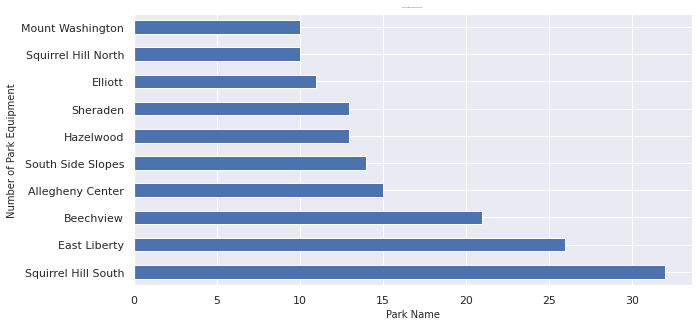

In [84]:
#make bar graph
sns.set()
plt.figure(figsize=(10,5))

park_series.sort_values(ascending = False)[:10].plot.barh()

plt.title("Count of Neighborhood Park Equipment",size=1)
plt.xlabel("Park Name", size=10)
plt.ylabel("Number of Park Equipment", size=10)



#### Tracy's Conclusion:  
The neighborhood with the largest park based off its equipment is **Squirrel Hill South**.  

In [85]:
#add it to hoods_rank for comparison
sort_3 = park_series.sort_values(ascending = False).to_dict()

i=15
#add score to first 15 items
for key in sort_3:
    if key in hood_rank:
        hood_rank[key] += i
    else:
        hood_rank[key] = i
    i-=1
    if i==0:
        break

print(hood_rank)

{'Swisshelm Park': 15, 'Summer Hill': 18, 'Oakwood': 13, 'Regent Square': 15, 'Banksville': 11, 'Squirrel Hill North': 17, 'Westwood': 9, 'Ridgemont': 20, 'Friendship': 7, 'Highland Park': 11, 'Stanton Heights': 5, 'Lincoln Place': 7, 'Squirrel Hill South': 18, 'Windgap': 2, 'North Oakland': 16, 'Central Oakland': 14, 'Golden Triangle': 13, 'Saint Clair': 11, 'Esplen': 10, 'East Carnegie': 9, 'Arlington Heights': 8, 'West End': 7, 'Chartiers City': 6, 'Hays': 5, 'Polish Hill': 2, 'Bluff': 1, 'East Liberty': 14, 'Beechview': 13, 'Allegheny Center': 12, 'South Side Slopes': 11, 'Hazelwood': 10, 'Sheraden': 9, 'Elliott': 8, 'Mount Washington': 6, 'Beltzhoover': 4, 'Garfield': 2, 'South Oakland': 1}


### Final Conclusion:

In [86]:
#convert to hood_rank to series for sorting
final_series = pd.Series(hood_rank, name = 'Top Neighborhoods')
#print top neighborhood
final_series.sort_values(ascending = False)[:5]


Ridgemont              20
Summer Hill            18
Squirrel Hill South    18
Squirrel Hill North    17
North Oakland          16
Name: Top Neighborhoods, dtype: int64

The winner is **Ridgemont**! 

Tracy's Conclusion: I'm originally from Virginia and have never been to Pennsylvania or Pittsburgh before so I wasn't very aware of these neighborhoods. However based on the information in my metric I believe Squirrel Hill South is the best neighborhood to play Pokemon Go in. It has plenty of equipment so gamers can have a more enjoyable time at the park while still catching Pokemon. Additionally, the amount of equipment also means the park has a larger area to play in making gamers able to catch more Pokemon. However, the grand winner was Ridgemont. I've never been to Ridgemont but based on how well it did in the other metrics, I am inclined to believe it is a great place to play Pokemon Go. 

Sophia's Conclusion: North Oakland won the gold in a close competition for best neighborhood to play Pokemon Go in according to my metric. North Oakland only has 11 children enrolled in school. Considering that Oakland itself is primarially a college town, this makes  a lot of sense. Specifically, North Oakland is home to half of the University of Pittsburgh's halls and academic buildings. Not many children to be found. I'm not from the Pittsburgh area but I'm not surprised that Ridgemont won the overall competition. With its small population and primarily residential feel, it would make a good area to play Pokemon Go. Honestly speaking, I've never played Pokemon Go so I'm not exactly sure what constitutes a good neighborhood to play, but I'll take our project's word for it. If I had to choose, I would assume Central Oakland would be the best neighborhood in Pittsburgh to Play Pokemon go but maybe I'm biased because it's the only neighborhood I'm familiar with. 

Grace's Conclusion: I am from Cranberry Twp, which is about 40 minutes north of Pittsburgh, so I am familiar with the city but I am not familiar with Ridgemont or Swisshelm Park at all. However, I don't think Ridgemont would actually be the best because I think the park metric is very important in determining Pokemon spawn, and Ridgemont did not rank high in that metric. I understand that it came in first because it was in mine and Sophia's top 10, and so few of our metrics had overlapping neighborhoods so it makes sense.  